## Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Receiving Brief Info of Dataset

In [2]:
googleplaystore = pd.read_csv("googleplaystore.csv")
df = googleplaystore.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe().T      # There should be more than 1 numeric columns as seen

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [6]:
# deleting rows that are not any use to us

del df['Last Updated']
del df['Current Ver']
del df['Android Ver']

### Handling Null Values

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [8]:
df["Rating"].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [9]:
# Filling null "Rating" values by mean of each category

df["Rating"].fillna(df.groupby("Category")["Rating"].transform("mean"),inplace = True)

In [10]:
null_in_content_rating  = df[df['Content Rating'].isnull()]
print(null_in_content_rating)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018  


In [11]:
# as seen in each column has slipped one value to the left so best to remove this row

df.loc[10471:10473, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools


In [12]:
# deleting the 10472th row

df = df.drop(labels=[10472], axis=0)

In [13]:
# As seen there are lots of missing info in this row, better to remove

null_in_type = df[df["Type"].isnull()]
print(null_in_type)

                            App Category    Rating Reviews  \
9148  Command & Conquer: Rivals   FAMILY  4.192272       0   

                    Size Installs Type Price Content Rating    Genres  
9148  Varies with device        0  NaN     0   Everyone 10+  Strategy  


In [14]:
# Deleting 9148th row

df = df.drop(labels=[9148], axis=0)

### Handling DTypes

In [15]:
# Cleaning "Installs" Column

df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))
df['Installs'] = df["Installs"].astype(int)

In [16]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [17]:
# Turning "Reviews" dtype into numeric

df["Reviews"] = df["Reviews"].astype(int)

In [18]:
# there are a lot of different values in size column, we should strip 'M','.' and 'k' symbols and we should turn values with kb into MB

df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
df[df["Size"] == "Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0,Everyone,Art & Design
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0,Everyone,Art & Design
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0,Everyone,Auto & Vehicles
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0,Everyone,Auto & Vehicles
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,100000,Free,0,Everyone,Auto & Vehicles
...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,100000,Free,0,Everyone,Weather
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000,Free,0,Everyone,Maps & Navigation
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000,Free,0,Mature 17+,Social
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0,Mature 17+,Social


In [20]:
# Changing "Varies with device" values into null and transforming megabyte into kilobyte

df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.str.replace("M","000")
df['Size'] = df.Size.str.replace("k","")
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] = df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

C:\Users\KORKMAZ\AppData\Local\Temp\ipykernel_6228\3090008979.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df.Price.str.replace("$","").astype(float)


dtype('float64')

In [23]:
df = df.drop_duplicates(subset="App")

In [24]:
df.to_csv("googleplaystore_v1.csv")

## Plotting

In [25]:
sorted_by_installs = df.sort_values(by = "Installs", ascending = False)
sorted_by_installs = sorted_by_installs.drop_duplicates(subset="App")
sorted_by_installs.head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,NaN,1000000000,Free,0.0,Everyone,Travel & Local
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication
2554,Google+,SOCIAL,4.2,4831125,NaN,1000000000,Free,0.0,Teen,Social
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0.0,Teen,Video Players & Editors


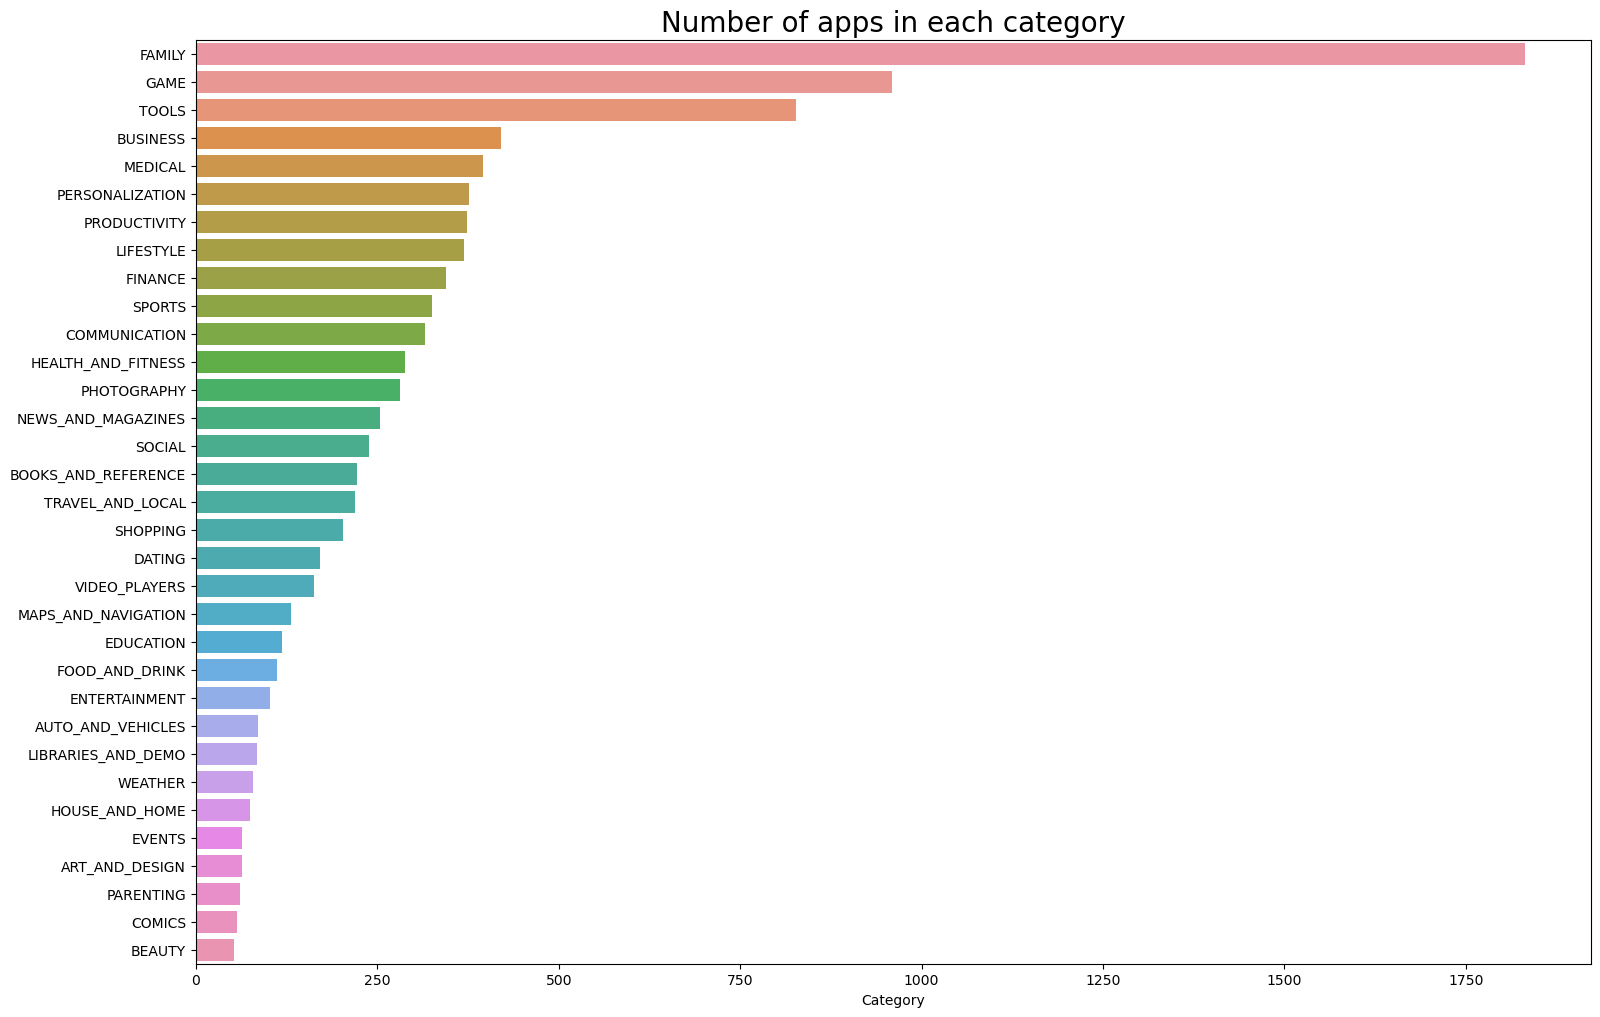

In [26]:
# Number of apps in each category by barplot.

plt.figure(figsize=(18,12))
categories = df.Category.value_counts()
sns.barplot(x=categories, y=categories.index, data=df).set_title("Number of apps in each category", fontsize=20);

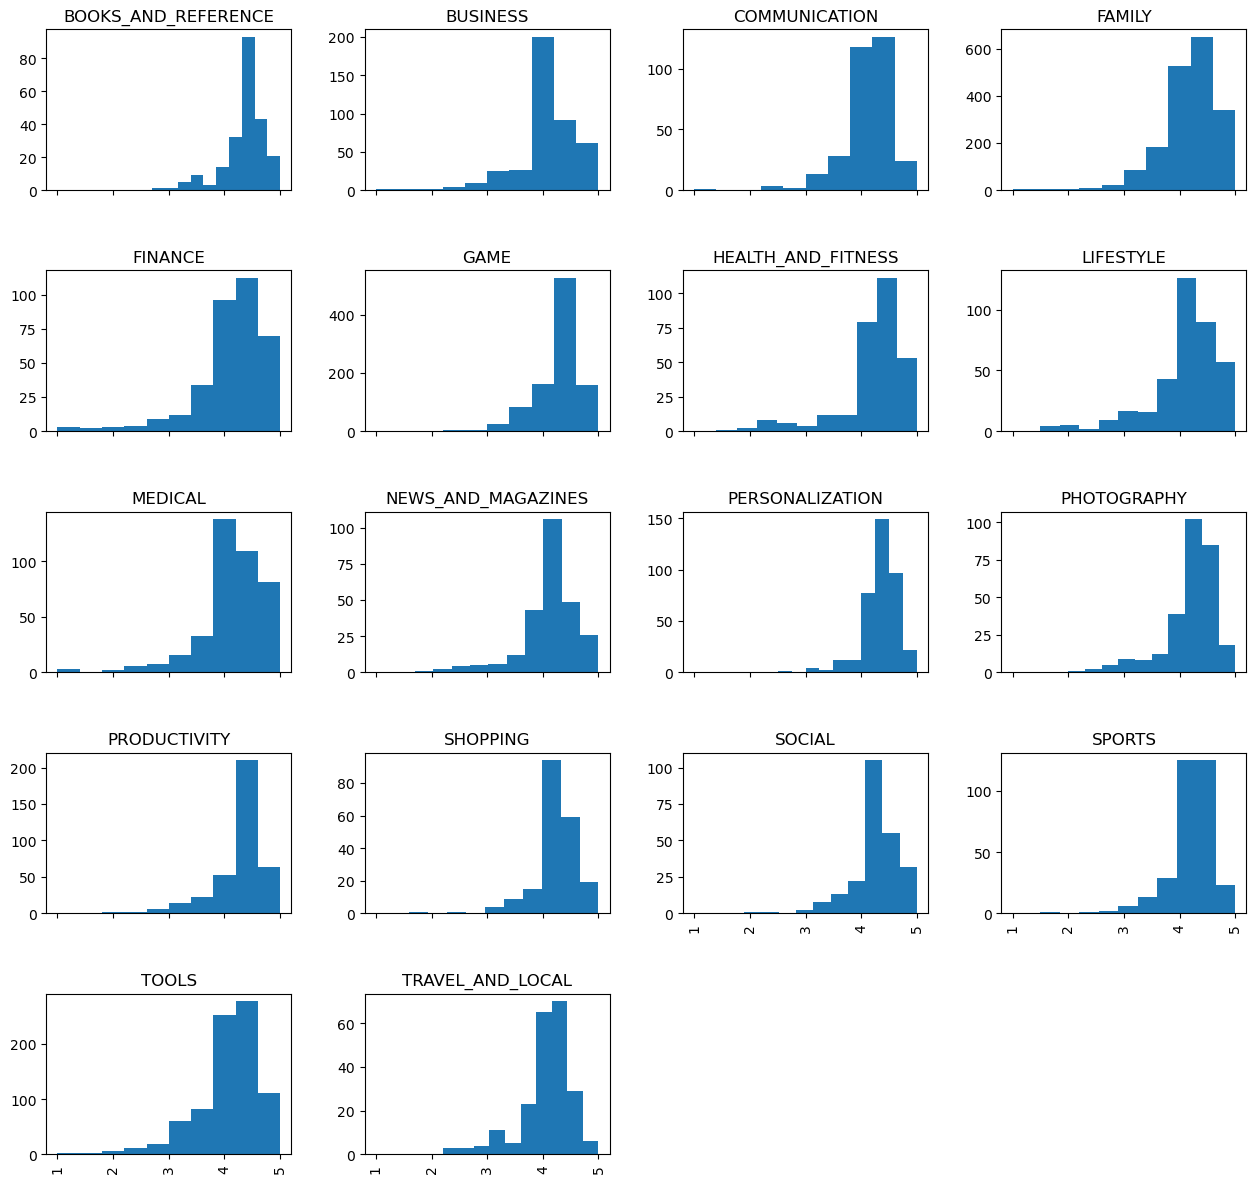

In [27]:
# Exploring app ratings across top categories

groups = df.groupby('Category').filter(lambda x: len(x) > 200)
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(15,15))

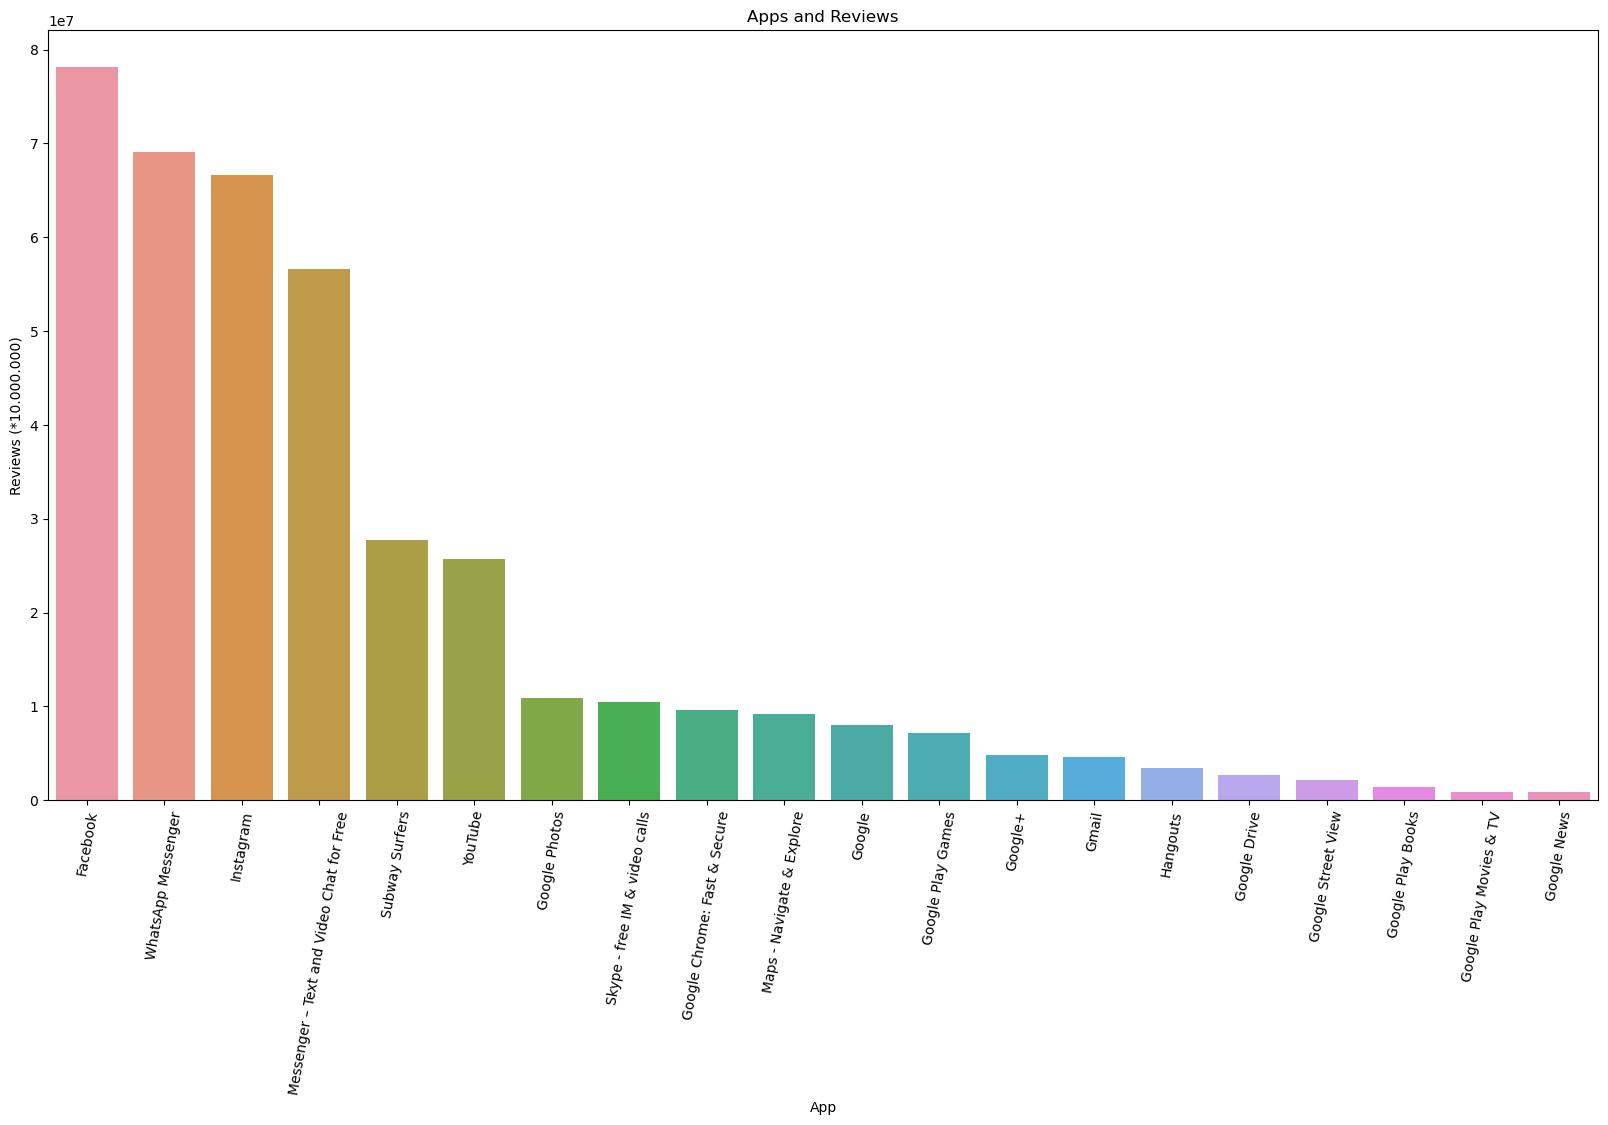

In [28]:
# Most Installed Apps & Reviews

app_list = list(sorted_by_installs["App"].head(20))
app_review = []

for i in app_list:
    x = sorted_by_installs[sorted_by_installs["App"] == i]
    if (len(x) != 0):
        review = sum(x.Reviews)/len(x)
        app_review.append(review)
    else:
        review = sum(x.Reviews)
        app_review.append(review)


data_app_reviews = pd.DataFrame({'category': app_list,'review':app_review})
new_index = (data_app_reviews['review'].sort_values(ascending=False)).index.values
sorted_data = data_app_reviews.reindex(new_index)

plt.figure(figsize=(20,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("App")
plt.ylabel("Reviews (*10.000.000)")
plt.title("Apps and Reviews")
plt.show()


In [29]:
# 1- Display (table) the unique names of all categories

unique_category = pd.DataFrame(df["Category"].unique())
unique_category

,0
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


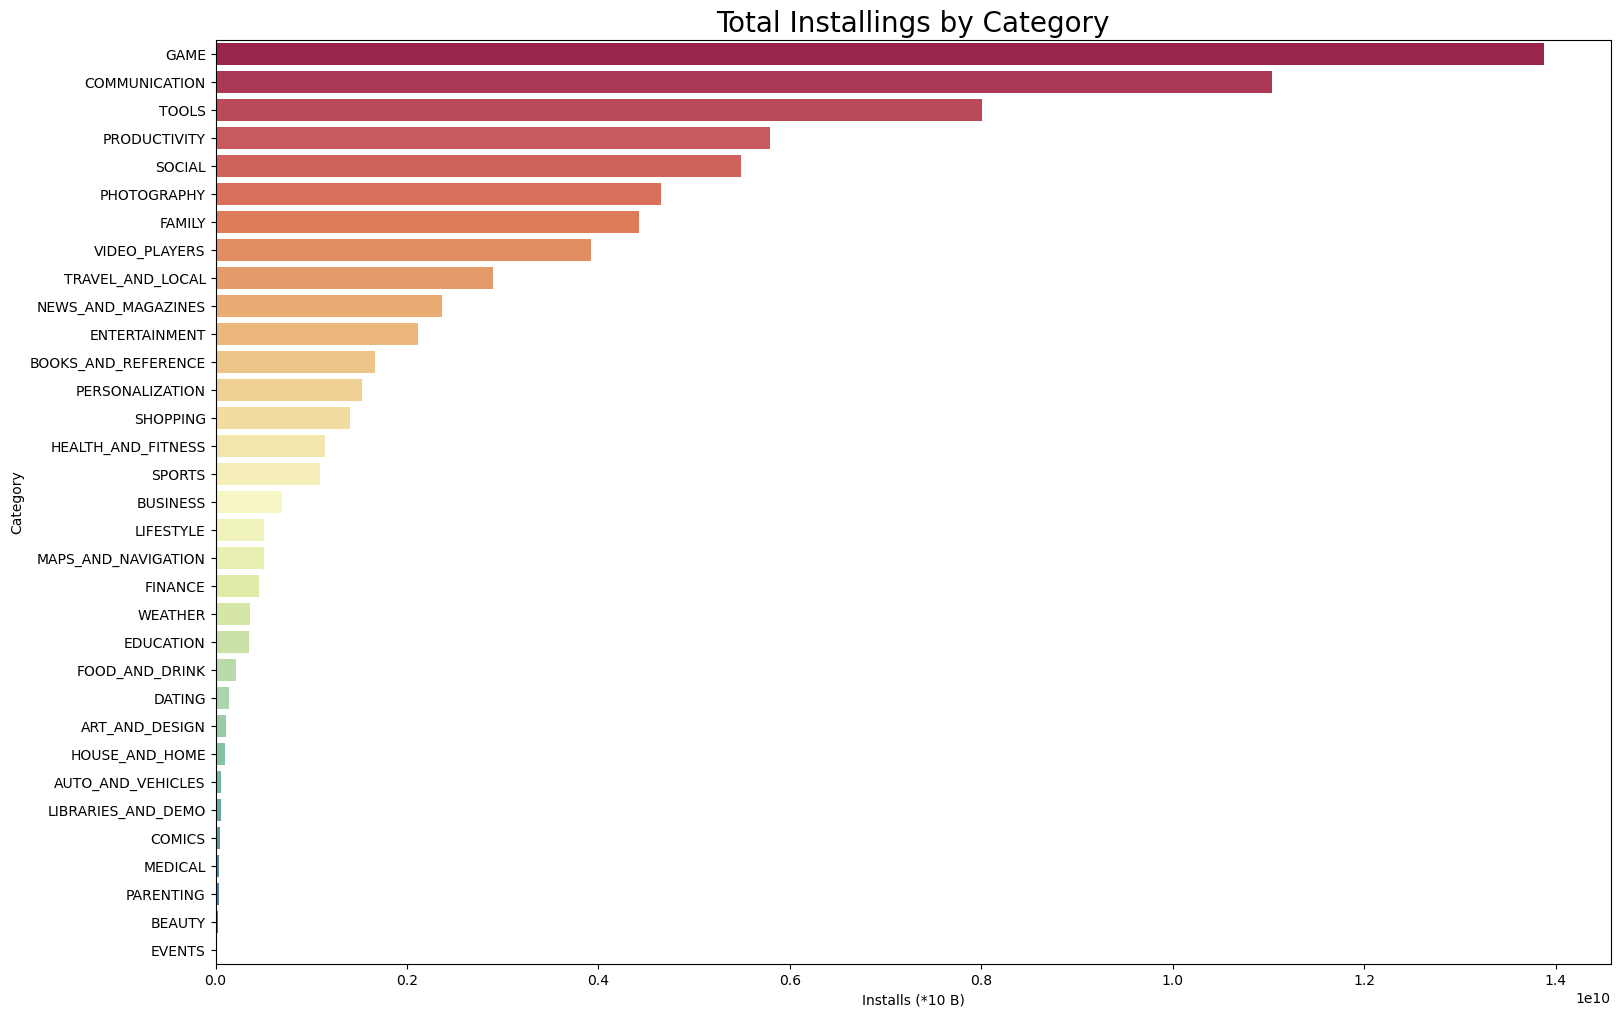

In [30]:
# 2- Plot a bar chart for categories with the total number of installing numbers in each category 

highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

x = []
y = []

for i in range(len(highest_Installs_df)):
    x.append(highest_Installs_df.Installs[i])
    y.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,12))

plt.xlabel("Installs (*10 B)")
plt.ylabel("Category")
graph = sns.barplot(x = x, y = y, palette = "Spectral")
graph.set_title("Total Installings by Category", fontsize = 20);

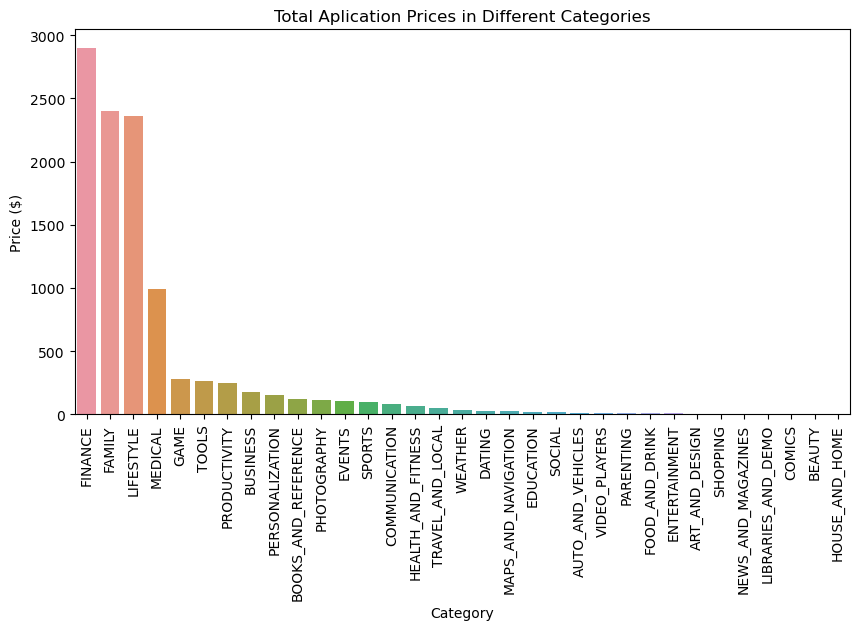

In [32]:
# 3- Plot a bar chart for the total prices of each paid app in each category ( the sum of all prices in the same category)

df_price = df.groupby("Category")["Price"].sum().sort_values(ascending = False).reset_index()


fig, ax = plt.subplots()
fig.set_size_inches(10,5)

sns.barplot(x = 'Category', y = 'Price', data = df_price)
ax.set_xlabel('Category')
ax.set_ylabel('Price ($)')
ax.set_title("Total Aplication Prices in Different Categories")
ax.tick_params('x', rotation = 90)